In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import yfinance as yf
stock_data = yf.download('AAPL',start = '2023-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470596,129.226036,122.582104,128.613970,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700
2023-01-06,127.962440,128.623871,123.292931,124.398611,87754700
2023-01-09,128.485641,131.703962,128.228972,128.801557,70790800
2023-01-10,129.058212,129.581433,126.481589,128.594221,63896200
2023-01-11,131.782928,131.802662,128.791677,129.571568,69458900
2023-01-12,131.703964,132.543085,129.759155,132.167955,71379600


In [5]:
stationary=stock_data['Close'].diff().dropna()

In [7]:
data_first=stationary[:-30]
data_last=stationary[-30:]

In [9]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [11]:
fitted=AutoReg(data_first,lags=30)
model=fitted.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
predictions=model.predict(
   start=len(data_first),
   end=len(data_first)+len(data_last)-1)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
#x=len(data_first)
data_last

#z=len(data_first)+len(data_last)-1
#x,y,z

Ticker,AAPL
Date,
2025-05-22,-0.729996
2025-05-23,-6.089996
2025-05-27,4.940002
2025-05-28,0.209991
2025-05-29,-0.470001
2025-05-30,0.900009
2025-06-02,0.849991
2025-06-03,1.570007
2025-06-04,-0.449997


In [17]:
predictions

597   -1.421224
598    1.642727
599   -0.536276
600    1.091485
601    0.085687
602    1.429550
603   -0.765205
604    0.182077
605   -2.597045
606   -2.110235
607    0.604628
608    1.025619
609    1.144515
610    0.197492
611    0.779655
612    1.320892
613    0.661871
614   -0.551178
615    0.337117
616    0.264355
617   -0.090170
618   -1.141671
619   -1.493051
620    0.430517
621    0.459645
622    0.566657
623   -0.013270
624    0.386336
625    0.352767
626    0.440142
dtype: float64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

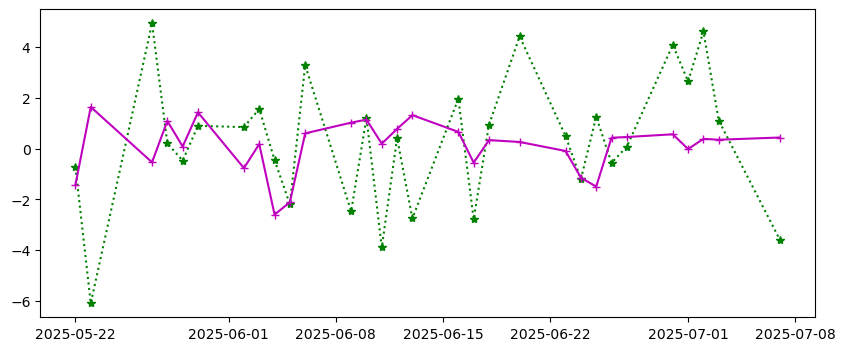

In [21]:
plt.figure(figsize=(10,4),edgecolor='silver')
plt.plot(data_last.index,data_last,linestyle=':',color='g',marker='*')
plt.plot(data_last.index,predictions,marker='+',color='m')
plt.show()


In [23]:
r2_score = round(mean_squared_error(data_last,predictions),2)
r2_score

8.04

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(data_first,order=(0,0,30))
model_fit=model1.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
predictions1=model_fit.predict(start=len(data_first),end=len(data_first)+len(data_last)-1)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
predictions1

597   -2.710743
598    2.107413
599    0.542977
600    0.426709
601    0.557858
602    0.521784
603   -0.676842
604    0.764492
605   -1.426547
606   -1.794241
607    0.685899
608    1.033925
609    1.312312
610    0.437194
611   -0.441166
612    1.323643
613    0.560083
614   -0.653536
615   -0.614710
616   -0.579473
617    0.850335
618    0.221597
619   -1.051136
620    0.466090
621    0.036570
622   -0.310833
623    0.319526
624    0.438961
625    0.849283
626    0.821832
Name: predicted_mean, dtype: float64

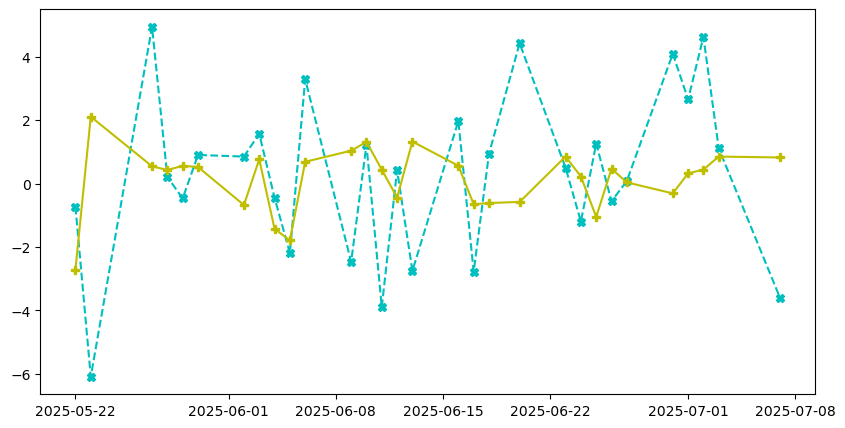

In [31]:
plt.figure(figsize=(10,5))
plt.plot(data_last.index,data_last,linestyle='--',marker='X',color='c')
plt.plot(data_last.index,predictions1,linestyle='-',marker='P',color='y')
plt.show()

In [33]:
r2_score1=round(mean_squared_error(data_last,predictions1),2)
r2_score1

8.51

In [77]:
model3=ARIMA(data_first,order=(7,0,7))
model3_fit=model3.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
predictions2=model3_fit.predict(start=len(data_first),end=len(data_first)+len(data_last)-1)
predictions2.head()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


597   -1.808863
598    0.354329
599   -1.082215
600    2.137987
601    2.005756
Name: predicted_mean, dtype: float64

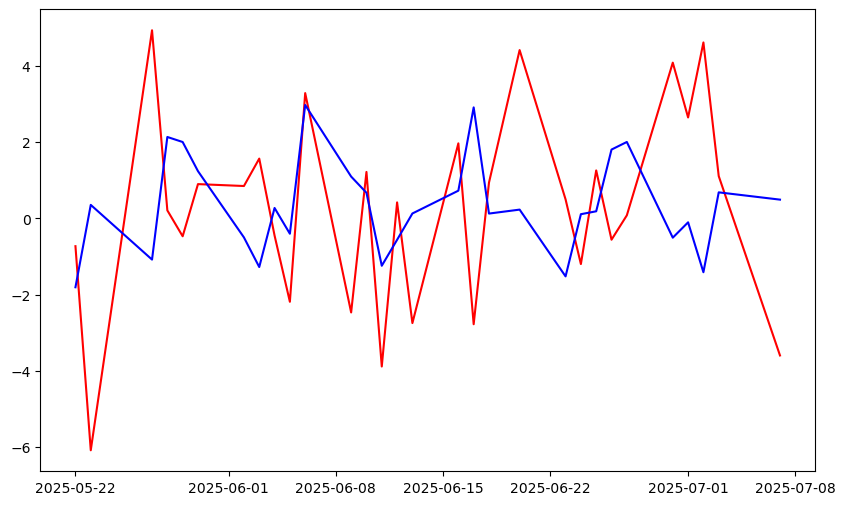

9.42

In [93]:
plt.figure(figsize=(10,6))
plt.plot(data_last.index,data_last,color='r')
plt.plot(data_last.index,predictions2,color='b')
plt.show()

r2_s=round(mean_squared_error(data_last,predictions2),2)
r2_s

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
seasonal_data=seasonal_decompose(stock_data['Close'],model='additive',period=30)
ab=seasonal_data.trend
cb=seasonal_data.resid
db=seasonal_data.seasonal

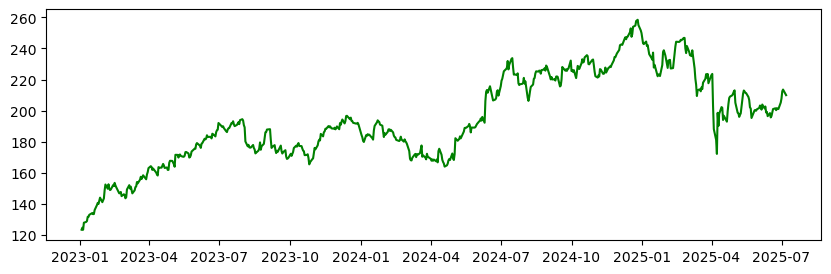

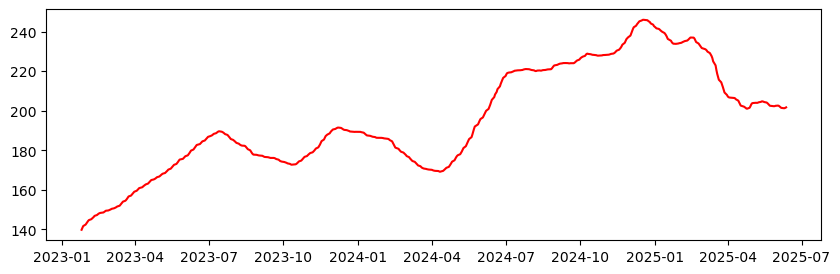

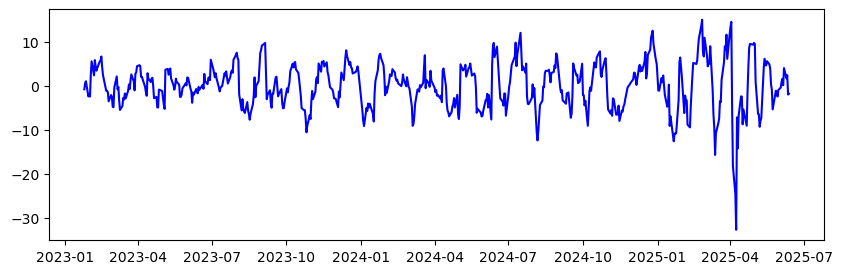

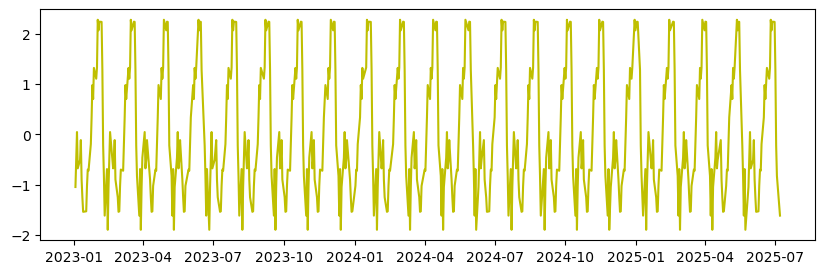

In [39]:
plt.figure(figsize=(10,3))
plt.plot(stock_data.index,stock_data['Close'],color='g')
plt.figure(figsize=(10,3))
plt.plot(ab.index,ab,color='r')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(cb.index,cb,color='b')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(db.index,db,color='y')
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
ad_test=adfuller(stock_data['Close'])
ad_test



(-2.3448777335294833,
 0.1579020749697312,
 5,
 622,
 {'1%': -3.4409070618215996,
  '5%': -2.8661978948030686,
  '10%': -2.569250572471335},
 3164.0811855525244)

In [43]:
if (ad_test[1]>0.05):
    print("non stationary")
    


non stationary


In [47]:
import numpy as np
#window_size=5
#stock_data['SMA']=stock_data['Close'].rolling(window=window_size).mean()
#plt.figure(figsize=(10,6))
#plt.plot(stock_data['SMA'],color='b')
#plt.show()
#plt.plot(stock_data['Close'], color='g')
#plt.show()

In [49]:
stock_data1 = yf.download('AAPL',start = '2024-01-01')
stock_data1

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862808,181.431323,178.860156,180.666932,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
...,...,...,...,...,...
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800
2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900


In [51]:
window_size=20
stock_data1['SMA']= stock_data1['Close'].rolling(window=window_size).mean()

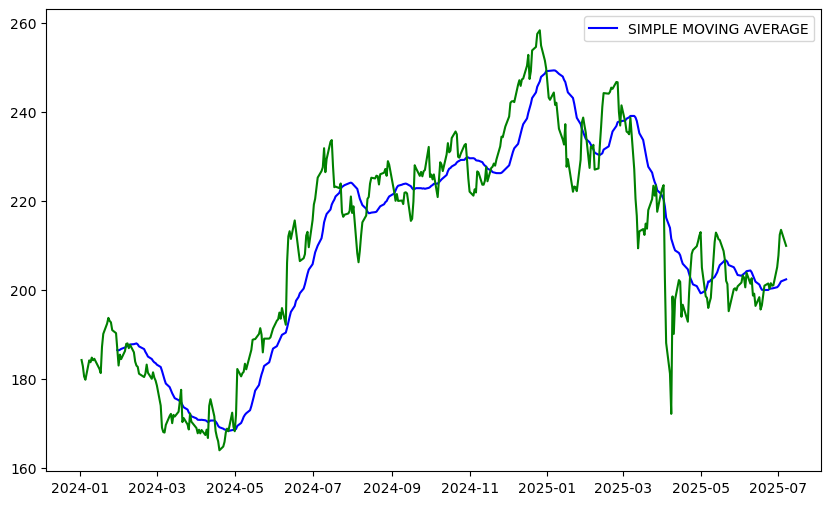

In [53]:
plt.figure(figsize=(10,6))
plt.plot(stock_data1['SMA'], label='SIMPLE MOVING AVERAGE', color='b')
plt.plot(stock_data1['Close'], color='g')
plt.legend()
plt.show()

In [55]:
weights=np.arange(1,window_size+1)
stock_data1['WMA']=stock_data1['Close'].rolling(window_size).apply(lambda pack : np.dot(pack,weights)/weights.sum(),raw=True)
stock_data1['WMA'].tail()

Date
2025-06-30    200.520619
2025-07-01    201.202810
2025-07-02    202.295858
2025-07-03    203.450953
2025-07-07    204.212096
Name: WMA, dtype: float64

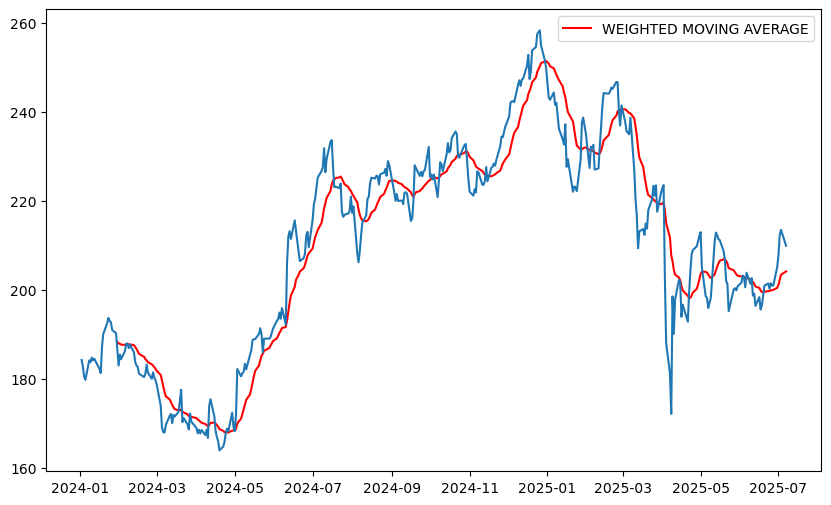

In [57]:
plt.figure(figsize=(10,6))
plt.plot(stock_data1['WMA'],label='WEIGHTED MOVING AVERAGE',color='r')
plt.plot(stock_data1['Close'])
plt.legend()
plt.show()

In [59]:
stock_data1['EMA']=stock_data1['Close'].ewm(span=window_size).mean()
stock_data1['EMA'].tail()

Date
2025-06-30    201.104847
2025-07-01    201.744386
2025-07-02    202.763016
2025-07-03    203.790348
2025-07-07    204.376981
Name: EMA, dtype: float64

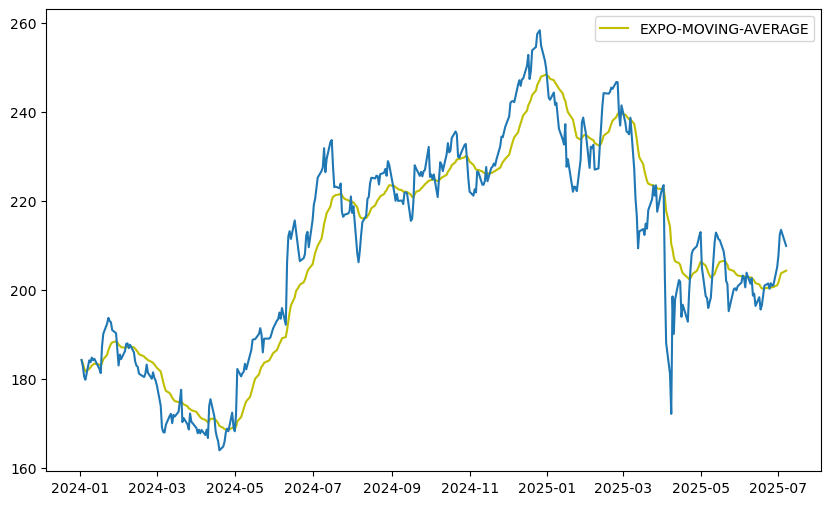

In [61]:
plt.figure(figsize=(10,6))
plt.plot(stock_data1['EMA'],label='EXPO-MOVING-AVERAGE',color='y')
plt.plot(stock_data1['Close'])
plt.legend()
plt.show()

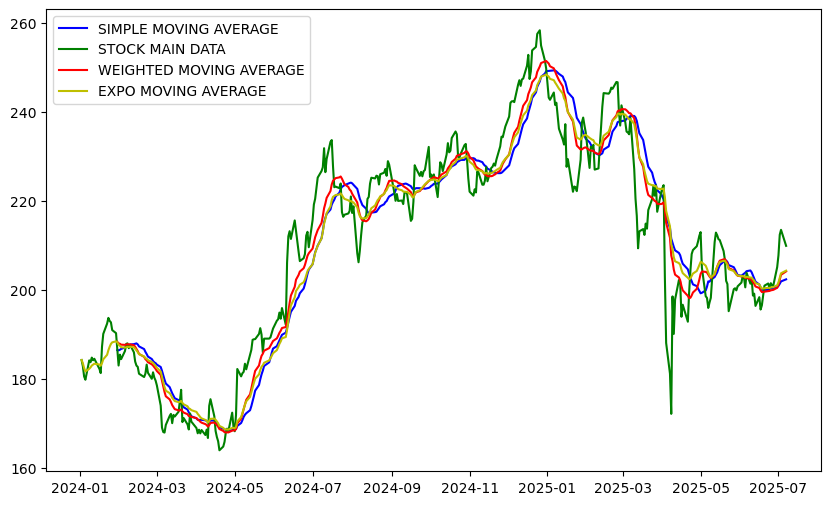

In [75]:
plt.figure(figsize=(10,6))
plt.plot(stock_data1['SMA'], label='SIMPLE MOVING AVERAGE', color='b')
plt.plot(stock_data1['Close'], label='STOCK MAIN DATA', color='g')
plt.plot(stock_data1['WMA'],label='WEIGHTED MOVING AVERAGE', color='r')
plt.plot(stock_data1['EMA'],label='EXPO MOVING AVERAGE', color='y')
plt.legend()
plt.show()